# Analytical transform pairs

Analytical transform pairs included by default in the add-on `fdesign` of `empymod`. They are checked here with the 201 pt filters ($J_0$, $J_1$) and the 81 pt filters (sine, cosine) by Key (2009).

Key, K., 2009, 1D inversion of multicomponent, multifrequency marine CSEM data: Methodology and synthetic studies for resolving thin resistive layers: Geophysics, 74, F9-F20; DOI: [10.1190/1.3058434](http://dx.doi.org/10.1190/1.3058434).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from empyscripts import fdesign
from empymod.filters import key_201_2009, key_81_CosSin_2009

%matplotlib inline
plt.style.use('seaborn-notebook')

filtj01 = key_201_2009()
filtsc = key_81_CosSin_2009()

In [2]:
def plot_result(r1, rhs1a, rhs1c, tit1, r2, rhs2a, rhs2c, tit2):
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.title('|'+tit1+'|')
    plt.loglog(r1, np.abs(rhs1a), lw=2, label='Analytical')
    plt.loglog(r1, np.abs(rhs1c), '-.', lw=2, label='Calculated')
    plt.xlabel('b')
    plt.legend()

    plt.subplot(122)
    plt.title('|'+tit2+'|')
    plt.loglog(r2, np.abs(rhs2a), lw=2, label='Analytical')
    plt.loglog(r2, np.abs(rhs2c), '-.', lw=2, label='Calculated')
    plt.xlabel('b')
    plt.legend()
    plt.show()

##  Hankel

### `j0_1, j1_1`

$$
  \int^\infty_0\,x \exp\left(-ax^2\right) J_0(bx)\,dx =
  \frac{\exp\left(\frac{-b^2}{4a}\right)}{2a}
$$

$$
\int^\infty_0\,x^2 \exp\left(-ax^2\right) J_1(bx)\,dx =
\frac{b}{4a^2} \exp\left(-\frac{b^2}{4a}\right)
$$

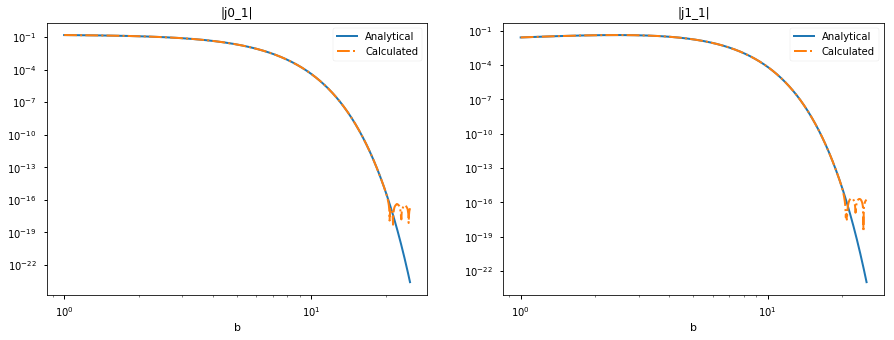

In [3]:
r = np.logspace(0, 1.4, 1000)
k = filtj01.base/r[:, None]
tp0 = fdesign.j0_1(3)
tp1 = fdesign.j1_1(3)

rhs1a = tp0.rhs(r)
rhs1c = np.dot(tp0.lhs(k), filtj01.j0)/r

rhs2a = tp1.rhs(r)
rhs2c = np.dot(tp1.lhs(k), filtj01.j1)/r

plot_result(r, rhs1a, rhs1c, 'j0_1', r, rhs2a, rhs2c, 'j1_1')

### `j0_2, j1_2`

$$
    \int^\infty_0\,\exp\left(-ax\right) J_0(bx)\,dx =
    \frac{1}{\sqrt{a^2+b^2}}
$$

$$
\int^\infty_0\,\exp\left(-ax\right) J_1(bx)\,dx =
\frac{\sqrt{a^2+b^2}-a}{b\sqrt{a^2 + b^2}}
$$

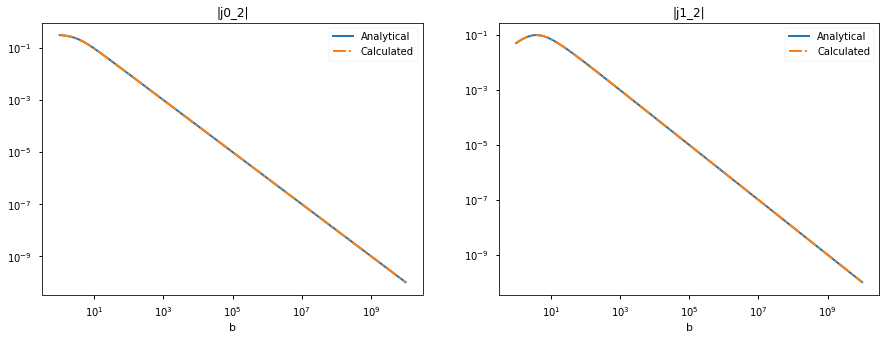

In [4]:
r = np.logspace(0, 10, 1000)
k = filtj01.base/r[:, None]
tp0 = fdesign.j0_2(3)
tp1 = fdesign.j1_2(3)

rhs1a = tp0.rhs(r)
rhs1c = np.dot(tp0.lhs(k), filtj01.j0)/r

rhs2a = tp1.rhs(r)
rhs2c = np.dot(tp1.lhs(k), filtj01.j1)/r

plot_result(r, rhs1a, rhs1c, 'j0_2', r, rhs2a, rhs2c, 'j1_2')

### `j0_3, j1_3`

$$
\int^\infty_0\,x\exp\left(-ax\right) J_0(bx)\,dx =
\frac{a}{(a^2 + b^2)^{3/2}}
$$

$$
    \int^\infty_0\,x \exp\left(-ax\right) J_1(bx)\,dx =
    \frac{b}{(a^2 + b^2)^{3/2}}
$$

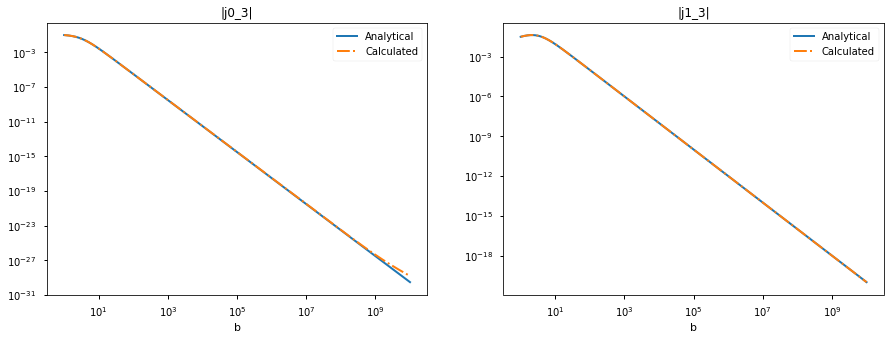

In [5]:
r = np.logspace(0, 10, 1000)
k = filtj01.base/r[:, None]
tp0 = fdesign.j0_3(3)
tp1 = fdesign.j1_3(3)

rhs1a = tp0.rhs(r)
rhs1c = np.dot(tp0.lhs(k), filtj01.j0)/r

rhs2a = tp1.rhs(r)
rhs2c = np.dot(tp1.lhs(k), filtj01.j1)/r

plot_result(r, rhs1a, rhs1c, 'j0_3', r, rhs2a, rhs2c, 'j1_3')

### `j0_4, j1_4`

$$
    \int^\infty_0\,\frac{x}{\beta} \exp\left(-\beta|z-z'|\right)
    J_0(bx)\,dx =
    \frac{\exp\left(-\gamma R\right)}{R}
$$

$$
    \int^\infty_0\,\frac{x^2}{\beta} \exp\left(-\beta|z-z'|\right)
    J_1(bx)\,dx =
    \frac{b(\gamma R+1)}{R^3}\exp\left(-\gamma R\right)
$$

$$
a>0,\quad b>0;\quad
R = \sqrt{b^2 + (z-z')^2};\quad
\gamma = \sqrt{2j\pi\mu_0f/\rho}; \quad
\beta = \sqrt{x^2 + \gamma^2}
$$

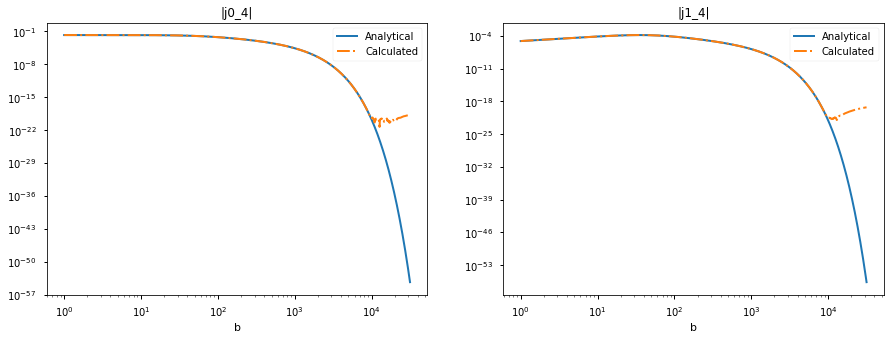

In [6]:
r = np.logspace(0, 4.5, 1000)
k = filtj01.base/r[:, None]
tp0 = fdesign.j0_4()
tp1 = fdesign.j1_4()

rhs1a = tp0.rhs(r)
rhs1c = np.dot(tp0.lhs(k), filtj01.j0)/r

rhs2a = tp1.rhs(r)
rhs2c = np.dot(tp1.lhs(k), filtj01.j1)/r

plot_result(r, rhs1a, rhs1c, 'j0_4', r, rhs2a, rhs2c, 'j1_4')

### `j0_5, j1_5`

$$
    \int^\infty_0\,x \exp\left(-\beta|z-z'|\right)
    J_0(bx)\,dx =
    \frac{|z-z'|(\gamma R + 1)}{R^3}\exp\left(-\gamma R\right)
$$

$$
    \int^\infty_0\,x^2 \exp\left(-\beta|z-z'|\right)
    J_1(bx)\,dx =
    \frac{b|z-z'|(\gamma^2R^2+3\gamma R+3)}{R^5}\exp\left(-\gamma R\right)
$$

$$
a>0,\quad b>0;\quad
R = \sqrt{b^2 + (z-z')^2};\quad
\gamma = \sqrt{2j\pi\mu_0f/\rho}; \quad
\beta = \sqrt{x^2 + \gamma^2}
$$

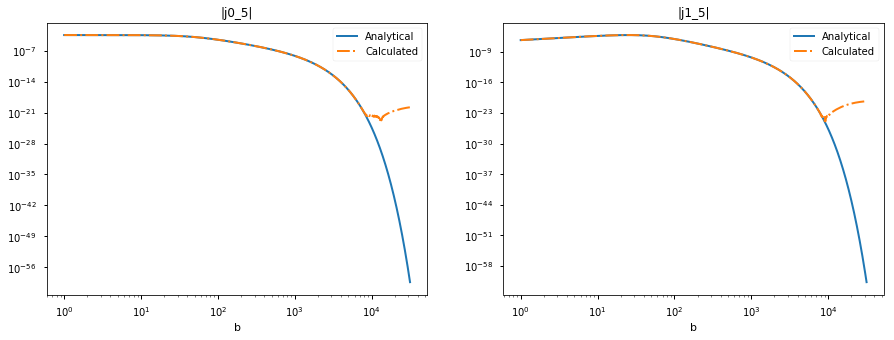

In [7]:
r = np.logspace(0, 4.5, 1000)
k = filtj01.base/r[:, None]
tp0 = fdesign.j0_5()
tp1 = fdesign.j1_5()

rhs1a = tp0.rhs(r)
rhs1c = np.dot(tp0.lhs(k), filtj01.j0)/r

rhs2a = tp1.rhs(r)
rhs2c = np.dot(tp1.lhs(k), filtj01.j1)/r

plot_result(r, rhs1a, rhs1c, 'j0_5', r, rhs2a, rhs2c, 'j1_5')

##  Fourier

### `sin_1, cos_1`

$$
    \int^\infty_0\,x\exp\left(-a^2x^2\right) \sin(bx)\,dx =
    \frac{\sqrt{\pi}b}{4a^3} \exp\left(-\frac{b^2}{4a^2}\right)
$$

$$
    \int^\infty_0\,\exp\left(-a^2x^2\right) \cos(bx)\,dx =
    \frac{\sqrt{\pi}}{2a} \exp\left(-\frac{b^2}{4a^2}\right)
$$

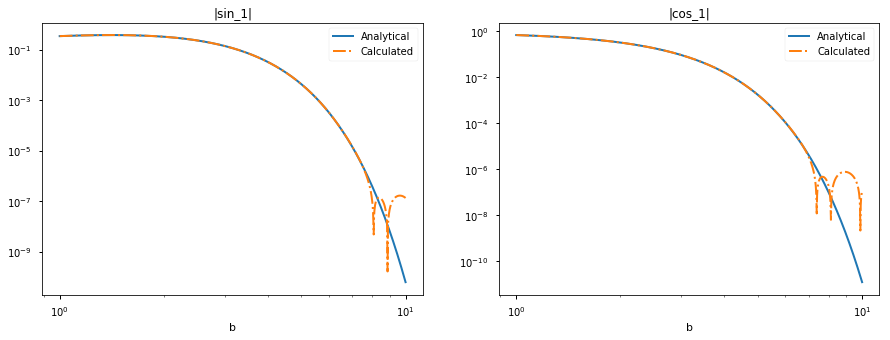

In [8]:
r = np.logspace(0, 1, 1000)
k = filtsc.base/r[:, None]
tp0 = fdesign.sin_1()
tp1 = fdesign.cos_1()

rhs1a = tp0.rhs(r)
rhs1c = np.dot(tp0.lhs(k), filtsc.sin)/r

rhs2a = tp1.rhs(r)
rhs2c = np.dot(tp1.lhs(k), filtsc.cos)/r

plot_result(r, rhs1a, rhs1c, 'sin_1', r, rhs2a, rhs2c, 'cos_1')

### `sin_2, cos_2`

$$
    \int^\infty_0\,\exp\left(-ax\right) \sin(bx)\,dx =
    \frac{b}{a^2 + b^2}
$$

$$
    \int^\infty_0\,\exp\left(-ax\right) \cos(bx)\,dx =
    \frac{a}{a^2 + b^2}
$$

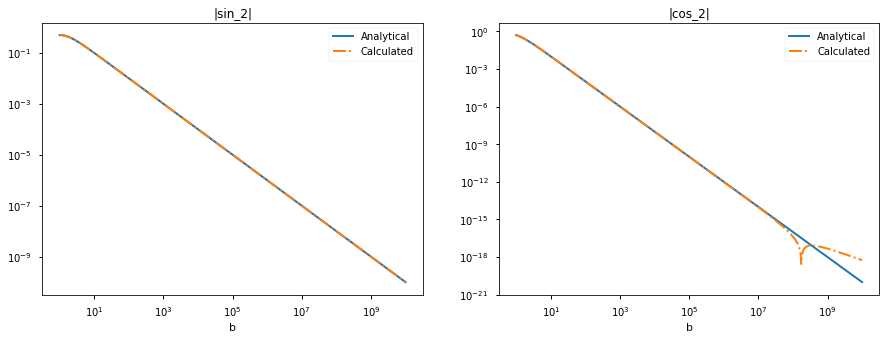

In [9]:
r = np.logspace(0, 10, 1000)
k = filtsc.base/r[:, None]
tp0 = fdesign.sin_2()
tp1 = fdesign.cos_2()

rhs1a = tp0.rhs(r)
rhs1c = np.dot(tp0.lhs(k), filtsc.sin)/r

rhs2a = tp1.rhs(r)
rhs2c = np.dot(tp1.lhs(k), filtsc.cos)/r

plot_result(r, rhs1a, rhs1c, 'sin_2', r, rhs2a, rhs2c, 'cos_2')

### `sin_3, cos_3`

$$
    \int^\infty_0\,\frac{x}{a^2+x^2} \sin(bx)\,dx =
    \frac{\pi}{2} \exp\left(-ab\right)
$$

$$
    \int^\infty_0\,\frac{1}{a^2+x^2} \cos(bx)\,dx =
    \frac{\pi}{2a} \exp\left(-ab\right)
$$

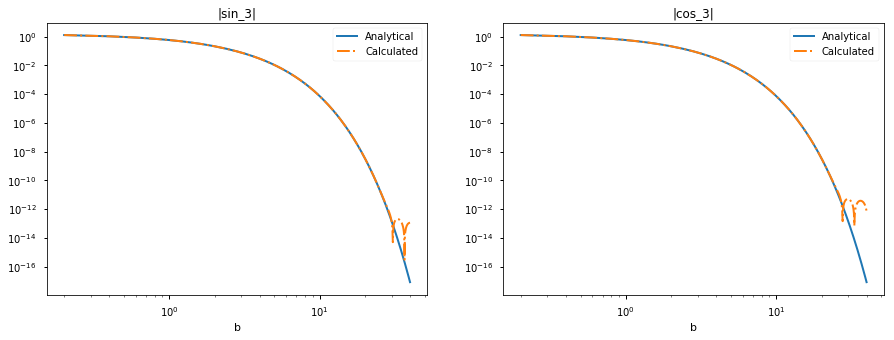

In [10]:
r = np.logspace(0, 1, 1000)
r = np.arange(1, 200)/5
k = filtsc.base/r[:, None]
tp0 = fdesign.sin_3()
tp1 = fdesign.cos_3()

rhs1a = tp0.rhs(r)
rhs1c = np.dot(tp0.lhs(k), filtsc.sin)/r

rhs2a = tp1.rhs(r)
rhs2c = np.dot(tp1.lhs(k), filtsc.cos)/r

plot_result(r, rhs1a, rhs1c, 'sin_3', r, rhs2a, rhs2c, 'cos_3')

In [11]:
import printinfo
printinfo.info()